$$ f(x) = \frac{x^6}{6} - 3x^4 - \frac{2x^3}{3} + \frac{27x^2}{2} + 18x - 30$$

$$ f'(x) = x^5 - 12x^3 - 2x^2 + 27^x + 18 $$

In [35]:
# firstly, what about plot this function?
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
x = np.arange(-4,4,0.00001)

In [17]:
y = (x**6)/6 - 3*x**4 - (2*x**3)/3 + (27*x**2)/2 + 18*x - 30 

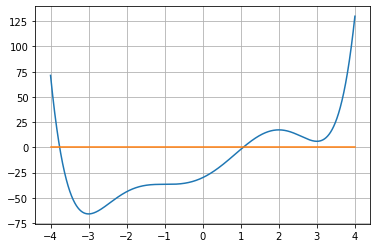

In [27]:
plt.plot(x,y)
plt.plot([-4,4],[0,0])
plt.grid()
plt.show()

From the plot, it looks like we have two roots, where x is about 1 and somewhere between -3 and -4.

$$ x_1 = x_0 - \frac{f(x_0)}{f'(x_0)} $$

In [29]:
def y(x):
    f = (x**6)/6 - 3*x**4 - (2*x**3)/3 + (27*x**2)/2 + 18*x - 30 
    return f 

In [30]:
def y_d(x):
    f_d = x**5 - 12*x**3 - 2*x**2 + 27*x + 18 
    return f_d 

In [31]:
# We'll first try to find the location of the root near x=1
# x0 = 1, let't find the first iteration of the Newton-Raphson method
x0 = 1
x1 = x0 - y(x0)/y_d(x0)

In [32]:
x1

1.0625

In [39]:
# Let's use code to find the other root, near x=-4
x = -4
d = {"x" : [x], "f(x)": [y(x)]}

for i in range(0, 10):
  x = x - y(x) / y_d(x)
  d["x"].append(x)
  d["f(x)"].append(y(x))

pd.set_option('display.float_format',lambda x : '%.3f' % x)
pd.DataFrame(d, columns=['x', 'f(x)'])

,x,f(x)
0,-4.000,71.333
1,-3.811,12.232
2,-3.763,0.652
3,-3.760,0.002
4,-3.760,0.000
5,-3.760,0.000
6,-3.760,0.000
7,-3.760,0.000
8,-3.760,0.000
9,-3.760,0.000


__Problem of Newton-Raphson__

Since the step size is given by $\delta x = -f(x) / f'(x)$. This can get big when $f'(x)$ is very small. In fact $f'(x)$ is exactly zero at turning points of $f(x)$. This is where Newton-Raphson behaves the worst since the step size is infinite.

In [41]:
# let't try this!
x = 1.99
d = {"x" : [x], "f(x)": [y(x)]}

for i in range(0, 20):
  x = x - y(x) / y_d(x)
  d["x"].append(x)
  d["f(x)"].append(y(x))

pd.set_option('display.float_format',lambda x : '%.3f' % x)
pd.DataFrame(d, columns=['x', 'f(x)'])

,x,f(x)
0,1.990,17.331
1,-36.475,387197492.178
2,-30.423,129602243.839
3,-25.385,43370123.837
4,-21.193,14508484.641
5,-17.708,4851112.638
6,-14.813,1620885.912
7,-12.411,541017.291
8,-10.423,180299.325
9,-8.783,59942.793


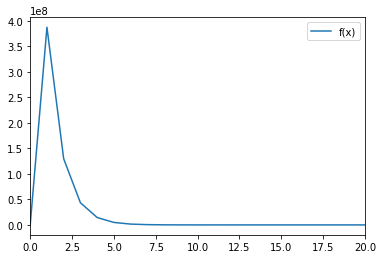

In [47]:
pd.DataFrame(d, columns=['f(x)']).plot()
# it's still converge to x = -3.760 and y = 0

In [52]:
# let't try this!
x = 3.1
d = {"x" : [x], "f(x)": [y(x)]}

for i in range(0, 20):
  x = x - y(x) / y_d(x)
  d["x"].append(x)
  d["f(x)"].append(y(x))

pd.set_option('display.float_format',lambda x : '%.3f' % x)
pd.DataFrame(d, columns=['x', 'f(x)']).head()

,x,f(x)
0,3.100,6.535
1,2.521,12.111
2,3.230,9.239
3,2.937,6.180
4,4.067,154.952


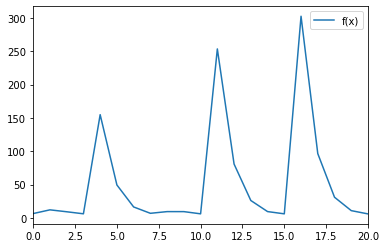

In [53]:
pd.DataFrame(d, columns=['f(x)']).plot()
# it does not converge!

Again, this is behaviour that happens in areas where the curve is not well described by a straight line - therefore our initial linearisation assumption was not a good one for such a starting point.

In [55]:
# In practice, often you will not need to hand craft optimisation methods
# as they can be called from libraries, such as scipy
from scipy import optimize

def f (x) :
  return x**6/6 - 3*x**4 - 2*x**3/3 + 27*x**2/2 + 18*x - 30
x0 = 3.1

optimize.newton(f, x0)

1.063070629709697